In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import read_csv
%matplotlib inline

In [74]:
d = read_csv('fuelprices.csv', skiprows = 5, delimiter = ';', index_col = 0, parse_dates=True, infer_datetime_format=True)

data = d.dropna()
data2 = data.rename({'euro/liter':'Euro95',  'euro/liter.1':'Diesel', 'euro/liter.2':'LPG' }, axis=1)
data2.index.names = ['Months']

display(data2)
data2.index = pd.to_datetime(data2.index)
data2.info()

,Euro95,Diesel,LPG
Months,,,
2018-01,1.589,1.292,0.696
2018-02,1.566,1.254,0.667
2018-03,1.545,1.260,0.654
2018-04,1.608,1.301,0.663
2018-05,1.668,1.360,0.675
2018-06,1.660,1.362,0.681
2018-07,1.661,1.356,0.688
2018-08,1.683,1.359,0.692
2018-09,1.680,1.384,0.714


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 60 entries, 2018-01-01 to 2022-12-01
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Euro95  60 non-null     float64
 1   Diesel  60 non-null     float64
 2   LPG     60 non-null     float64
dtypes: float64(3)
memory usage: 1.9 KB


Text(0.5, 1.0, 'Fuel prices per month')

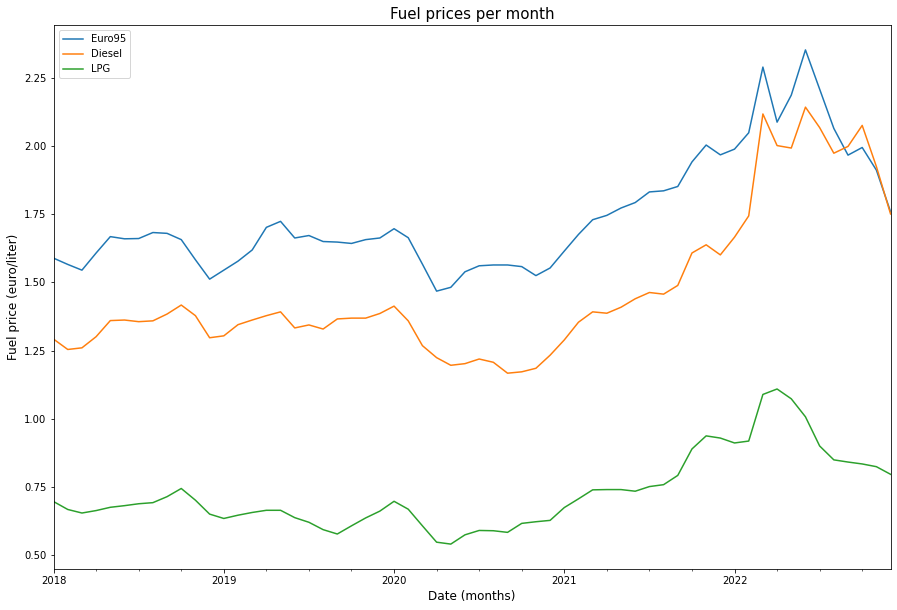

In [90]:
data2.plot(figsize=(15,10))
plt.ylabel('Fuel price (euro/liter)', fontsize=12)
plt.xlabel('Date (months)', fontsize=12)
plt.title('Fuel prices per month', fontsize=15)

In [128]:
mobility_trips = read_csv('mobility_perday.csv', index_col = 1, skiprows = 6, delimiter = ';', usecols = [0,1,2,3,4,5,6])
mobility_trips = mobility_trips.dropna()
mobility_trips = mobility_trips.drop('Travel modes')
mobility_trips = mobility_trips.rename({'Unnamed: 0':'motive'}, axis=1)
# display(mobility_trips)

group_periods = mobility_trips.groupby('Periods')
display(group_periods)

In [121]:
mobility_dist = read_csv('mobility_perday.csv', index_col = 1, skiprows = 6, delimiter = ';', usecols = [0,1,7,8,9,10,11])
mobility_dist = mobility_dist.dropna()
mobility_dist = mobility_dist.drop('Travel modes')
mobility_dist = mobility_dist.rename({'Unnamed: 0':'motive', '2018.1':'2018',  '2019.1':'2019', '2020.1':'2020', '2021.1':'2021', '2022.1':'2022'}, axis=1)
display(mobility_dist)

,motive,2018,2019,2020,2021,2022
Periods,,,,,,
Total,Total,36.16,36.00,24.88,27.24,30.21
Passenger car (driver),Total,18.16,18.02,13.14,14.05,15.13
Train,Total,3.88,4.08,1.60,1.67,2.62
Bike,Total,3.16,3.01,2.61,2.68,3.04
Walking,Total,0.90,0.88,1.12,1.38,1.21
Total,"Travel to/from work, (non)-daily commute",10.55,9.72,6.16,6.13,7.40
Passenger car (driver),"Travel to/from work, (non)-daily commute",6.79,6.20,4.37,4.33,4.90
Train,"Travel to/from work, (non)-daily commute",1.33,1.35,0.50,0.36,0.71
Bike,"Travel to/from work, (non)-daily commute",0.68,0.65,0.44,0.45,0.55
